<a href="https://colab.research.google.com/github/avashs/Deep-Learning/blob/main/Deep_Learning_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the fashion-mnist data
fashion_mnist = tf.keras.datasets.fashion_mnist

# the data are preshuffled and split into test and training set
(train, trainLabel), (test, testLabel) = tf.keras.datasets.fashion_mnist.load_data()

Here, we load the data. The fashion mist data are preshuffled and split into training and test set. From the website of fashion_mist data set we find that the data is split into 60000 training and 10000 test data set. The images are 28*28 greyscaled images.

(60000, 28, 28) <class 'numpy.ndarray'>
(60000, 28, 28) <class 'numpy.ndarray'>


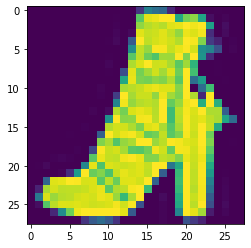

In [ ]:
print(train.shape, type(train))
print(train.shape,type(train))
img = 11
plt.imshow(train[img])

We look at the data obtained and visulaize it to see what we are working with.
From the website we find that the labels are set as integer from 0-9.
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

We then try to see what the image is classified as from the dataset

Ankle boot


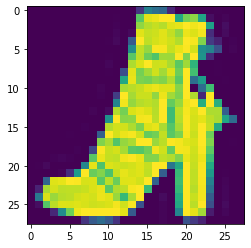

In [ ]:
labels = ["T-shirt/top",  # index 0
          "Trouser",      # index 1
          "Pullover",     # index 2 
          "Dress",        # index 3 
          "Coat",         # index 4
          "Sandal",       # index 5
          "Shirt",        # index 6 
          "Sneaker",      # index 7 
          "Bag",          # index 8 
          "Ankle boot"]   # index 9

label = trainLabel[img]
print (labels[label])
plt.imshow(train[img])

Since the data are in int we convert those into their actual labels


In [ ]:
train = train.astype('float32') / 255
test = test.astype('float32') / 255

We then normalize images and set range of the data 0-1.

In [ ]:
(train, valid) = train[5000:], train[:5000] 
(trainLabel, validLabel) = trainLabel[5000:], trainLabel[:5000]

print(train.shape, valid.shape)

(55000, 28, 28) (5000, 28, 28)


We then seperate the dataset into training and validation dataset.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


# tf.keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Here we compile our model setting to calculate loss sparse categorical crossentropy since each data belongs to different types of class.
We also optimize our model with Stochastic gradient descent 
and set accuracy metric for the model.

In [ ]:
modelFitting = model.fit(train, trainLabel, epochs= 40,
                    validation_data=(valid, validLabel))

Epoch 1/40
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4483 - accuracy: 0.8428 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4209 - accuracy: 0.8532 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4061 - accuracy: 0.8583 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8673 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3652 - accuracy: 0.8705 - val_loss: 0.3616 - val_accuracy:

Here we fit our model to for 40 epochs and we cna see the accuracy increasing slightly acroos each epoch. We can also see the loss reducing through each epoch. We then plot the metrics of the model to get a better visiulaization of how the machine is performing

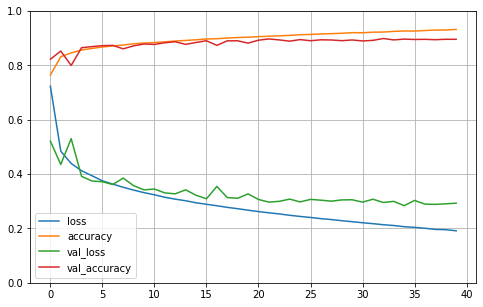

In [ ]:
import pandas as pd

pd.DataFrame(modelFitting.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Here we plot the losses and accuracy of validation data as well as training data. We can clearly see the losses gradually decreasing and accuracy gradullay increasing.

In [ ]:
model.evaluate(test, testLabel)

313/313 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8855


[0.32625600695610046, 0.8855000138282776]

We then evaluate the perfomance of our  test dataset and check the loss and 
accuracy of our model

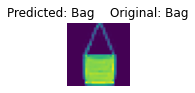

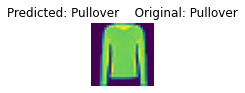

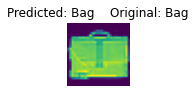

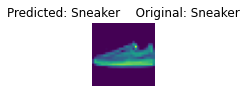

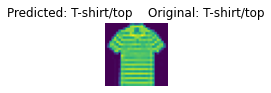

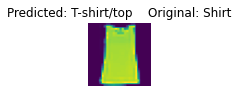

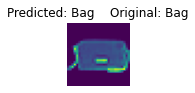

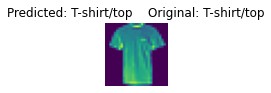

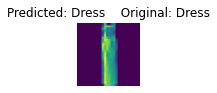

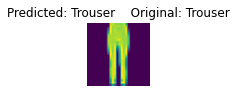

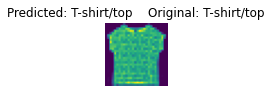

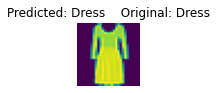

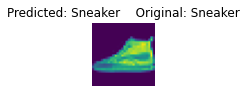

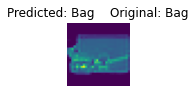

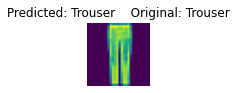

In [ ]:
predictLabel = model.predict(test)

import random

for i in range(15):
  index = random.randrange(4999)
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 15, i + 1)
  plt.imshow(test[index])
  plt.axis('off')
  tle = "Predicted: " + labels[np.argmax(predictLabel[index])] + "    Original: " + labels[(testLabel[index])]
  plt.title( tle, fontsize=12)


Here we predict the images using our model for the test data set. Then we show some randomly selected image and check its prediction against the original label.